In [1]:
import os

import cv2
import numpy as np
import tensorflow
# from tensorflow.python.compiler.mlcompute import mlcompute; 
# tensorflow.compat.v1.enable_eager_execution()
# mlcompute.set_mlc_device(device_name='gpu')
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

["angry","disgusted","fearful","happy","neutral","sad","surprised"] represent [0,1,2,3,4,5,6] respectively

In [2]:
features_train=[]
targets_train=[]
for i in ["angry","disgusted","fearful","happy","neutral","sad","surprised"]:
    imagenames=os.listdir("/Users/akshaykumar/Downloads/archive/train"+"/"+i)
    for j in imagenames:
        imagearray=cv2.imread("/Users/akshaykumar/Downloads/archive/train"+"/"+i+"/"+j)
        features_train.append(imagearray)
        if i=="angry":
            targets_train.append(0)
        elif i=="disgusted":
            targets_train.append(1)
        elif i=="fearful":
            targets_train.append(2)
        elif i=="happy":
            targets_train.append(3)
        elif i=="neutral":
            targets_train.append(4)
        elif i=="sad":
            targets_train.append(5)
        elif i=="surprised":
            targets_train.append(6)
        
    print("Reading folder",i)
    

Reading folder angry
Reading folder disgusted
Reading folder fearful
Reading folder happy
Reading folder neutral
Reading folder sad
Reading folder surprised


In [3]:
features_test=[]
targets_test=[]
for i in ["angry","disgusted","fearful","happy","neutral","sad","surprised"]:
    imagenames=os.listdir("/Users/akshaykumar/Downloads/archive/test"+"/"+i)
    for j in imagenames:
        imagearray=cv2.imread("/Users/akshaykumar/Downloads/archive/test"+"/"+i+"/"+j)
        features_test.append(imagearray)
        if i=="angry":
            targets_test.append(0)
        elif i=="disgusted":
            targets_test.append(1)
        elif i=="fearful":
            targets_test.append(2)
        elif i=="happy":
            targets_test.append(3)
        elif i=="neutral":
            targets_test.append(4)
        elif i=="sad":
            targets_test.append(5)
        elif i=="surprised":
            targets_test.append(6)
    print("Reading folder",i)
    

Reading folder angry
Reading folder disgusted
Reading folder fearful
Reading folder happy
Reading folder neutral
Reading folder sad
Reading folder surprised


In [4]:
features_train=np.array(features_train)
targets_train=np.array(targets_train)
features_test=np.array(features_test)
targets_test=np.array(targets_test)

In [5]:
features_train.shape

(28709, 48, 48, 3)

In [6]:
#preprocessing
'''images in training data are already black and white but still be code to convert image to black and
if maybe there is any colored image present
no need for resizing as all images are of same size 48x48 pixels'''

'images in training data are already black and white but still be code to convert image to black and\nif maybe there is any colored image present\nno need for resizing as all images are of same size 48x48 pixels'

In [7]:
def preprocessing(image):
    image=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    image=image/255
    return image

In [8]:
features_train=np.array(list(map(preprocessing,features_train)))


In [9]:
features_test.shape

(7178, 48, 48, 3)

In [10]:
features_test=np.array(list(map(preprocessing,features_test)))

In [11]:
features_train.shape

(28709, 48, 48)

In [12]:
features_test.shape

(7178, 48, 48)

In [13]:
features_train=features_train.reshape(28709, 48, 48,1)


In [14]:
features_test=features_test.reshape(7178, 48, 48,1)

In [15]:
features_test.shape

(7178, 48, 48, 1)

In [16]:
dataGen=ImageDataGenerator(rotation_range=10,width_shift_range=0.1,height_shift_range=0.1,zoom_range=0.2,shear_range=0.1)

In [17]:
dataGen.fit(features_train)

In [18]:
batches=dataGen.flow(features_train,targets_train,batch_size=30)

In [19]:
images,labels=next(batches)

In [20]:
images.shape

(30, 48, 48, 1)

In [21]:
images=images.reshape(30,48,48)

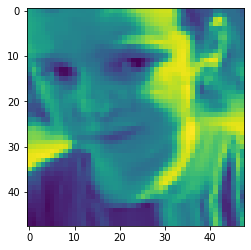

In [22]:
plt.imshow(images[0])
plt.show()

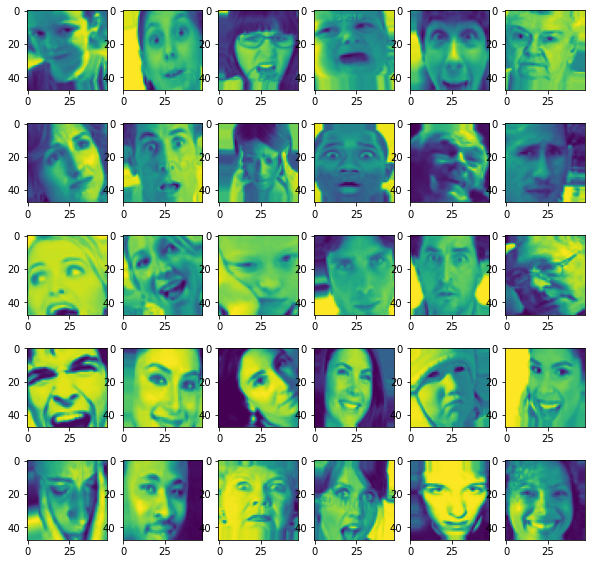

In [23]:
plt.figure(figsize=(10,10))
for i in range(30):
    plt.subplot(5,6,i+1)
    plt.imshow(images[i])
plt.show()

In [24]:
from tensorflow.keras.utils import to_categorical

In [25]:
targets_train=to_categorical(targets_train)

In [26]:
targets_test.shape

(7178,)

In [27]:
features_test.shape

(7178, 48, 48, 1)

In [28]:
targets_train.shape

(28709, 7)

In [29]:
tensorflow.config.run_functions_eagerly(True)

In [30]:
features_test.shape

(7178, 48, 48, 1)

# step1

In [31]:
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Dropout,BatchNormalization
from tensorflow.keras.models import Sequential

In [32]:
model=Sequential()
model.add(Conv2D(64,(3,3),activation="relu",input_shape=(48,48,1)))
model.add(MaxPooling2D((2,2)))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3),activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Conv2D(256,(3,3),activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Conv2D(512,(3,3),activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(256,(3,3),activation="relu"))
model.add(Dropout(0.25))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3),activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(BatchNormalization())
model.add(Dense(64,activation="relu"))
model.add(Dense(7,activation="softmax"))

# Step 2

In [33]:
from tensorflow.keras.optimizers import Adam

In [34]:
model.compile(Adam(learning_rate=0.003),loss="categorical_crossentropy", metrics=["accuracy"])

# Step 3

In [ ]:
model.fit_generator(dataGen.flow(features_train,targets_train,batch_size=30),epochs=60)

/opt/homebrew/Caskroom/miniforge/base/envs/tensorenv/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
/opt/homebrew/Caskroom/miniforge/base/envs/tensorenv/lib/python3.8/site-packages/tensorflow/python/data/ops/dataset_ops.py:3503: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  warnings.warn(
2021-10-31 22:04:03.851538: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-10-31 22:04:03.851755: W tensorflow/core/platform/profile_utils/cpu_utils.cc:126] Failed to get CPU frequency: 0 Hz


Epoch 1/60
 48/957 [>.............................] - ETA: 5:26 - loss: 2.0361 - accuracy: 0.1850

**Therefore, training accuracy= 81.98%**

#saving a model

In [36]:
modelinjson=model.to_json()

In [37]:
file1=open("/Users/akshaykumar/Downloads/Dataset.json","w")
file1.write(modelinjson)
file1.close()

In [38]:
model.save_weights("/Users/akshaykumar/Downloads/weights.h5")

#Loading saved model to use

In [35]:
from tensorflow.keras.models import model_from_json

In [36]:
file1=open("/Users/akshaykumar/Downloads/Dataset.json","r")
loaded_data=file1.read()
loaded_model=model_from_json(loaded_data)
loaded_model.load_weights("/Users/akshaykumar/Downloads/weights.h5")

# Step 4

#By loaded model

In [48]:
pred=loaded_model.predict(features_test)

#By fresh model

In [38]:
pred_fresh=model.predict(features_test)

In [49]:
targets_test.shape

(7178,)

In [50]:
features_train.shape
targets_train.shape

(28709, 7)

In [51]:
pred=np.argmax(pred, axis=1)

In [52]:
pred.shape

(7178,)

In [53]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(targets_test,pred)

In [54]:
print("Testing accuracy= "+str(round(accuracy*100,2))+"%")

Testing accuracy= 60.94%


# Taking photo from camera and predicting

In [55]:
# import cv2
# capt=cv2.VideoCapture(0)
# capt.set(3,600)
# capt.set(4,400)
# capt.set(10,180) #Brightness of the image (only for those cameras that support).

In [56]:
def emotion(index):
    if index==0 : return "angry"
    elif index==1: return "disgusted"
    elif index==2: return "fearful"
    elif index==3: return "happy"
    elif index==4: return "neutral"
    elif index==5: return "sad"
    elif index==6: return "surprised"
    

In [ ]:
import numpy as np
import cv2
capt=cv2.VideoCapture(0)
capt.set(3,600)
capt.set(4,400)
while True:
    try:
        message,image=capt.read()
        imagearray=np.asarray(image)
        #face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + '/Users/akshaykumar/Downloads/haarcascade_frontalface_default.xml')
        face_cascade = cv2.CascadeClassifier('/Users/akshaykumar/Downloads/haarcascade_frontalface_default.xml')
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        faces=face_cascade.detectMultiScale(gray,1.25,3)
        for (x,y,w,h) in faces:
            imagearray=imagearray[x:x+w,y:y+h]
            imagearray=cv2.resize(imagearray,(48,48))
            imagearray=preprocessing(imagearray)
            imagearray=imagearray.reshape(1,48,48,1)
            predictions=loaded_model.predict(imagearray)
            neuron_index=loaded_model.predict_classes(imagearray)
            cv2.putText(image,"Emotion:  ",(20,35),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),2)
            cv2.putText(image,"Probability: ",(20,75),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255,2))
            print(probability)
            probability=np.amax(predictions)
            cv2.putText(image,emotion(neuron_index),(200,45),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),2)
            cv2.putText(image,str(int(probability*100)),(250,75),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),2)
            cv2.imshow("Model_prediction",image)
            asciivalue=cv2.waitKey(1)
            if asciivalue==ord("q"):
                capt.release()
                cv2.destroyAllWindows()
                cv2.waitKey(1)
                exit()
        
    except:
        continue
            

/opt/homebrew/Caskroom/miniforge/base/envs/tensorenv/lib/python3.8/site-packages/tensorflow/python/data/ops/dataset_ops.py:3503: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorenv/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [8]:
capt.release()
cv2.destroyAllWindows()